In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression

In [61]:
#Load the dataset 
dir = 'subsample_data'
data = pd.read_csv(dir,header=0)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33,35,56) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
#Check data info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 67 columns):
Unnamed: 0                                                          10000 non-null object
Unnamed: 1                                                          10000 non-null int64
Physician_License_State_code2                                       123 non-null object
Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5           59 non-null object
Recipient_State                                                     9989 non-null object
Recipient_Country                                                   9993 non-null object
Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1           8205 non-null object
Form_of_Payment_or_Transfer_of_Value                                10000 non-null object
Associated_Drug_or_Biological_NDC_4                                 102 non-null object
Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4           151 non-null object
Cover

In [64]:
#Split the datset into the targeted feature and predictive features
target = data['Target']
features = data.drop('Target', axis=1)

In [65]:
#Create a pairplot for all numeric features to see distribution trends and other important elements
numerics = features._get_numeric_data()

# sns.pairplot(numerics,size=5)

In [66]:
#Check the number of missing values of numeric features
num = numerics.isnull().sum()

#Extract columns which have fewer than 5000 nulls
num_name = []
for i in range(len(num)):
    if(num[i-1] < 5000):
        num_name.append(num.index.tolist()[i-1])
    else:
        continue

#Create the dataframe for numeric variables , create a new dataframe named num_name, and store each variable's name   
temp = data[num_name]
temp.head()
num_temp = temp[['Unnamed: 1','Total_Amount_of_Payment_USDollars']]
num_name = list(num_temp)

In [67]:
#Store the list of names of numeric features
numeric_features = list(numerics)
numeric_features

['Unnamed: 1',
 'Teaching_Hospital_CCN',
 'Total_Amount_of_Payment_USDollars',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
 'Teaching_Hospital_ID',
 'Program_Year',
 'Record_ID',
 'Physician_Profile_ID']

In [68]:
#Extract categorical features and store the list of names of categorical features
categoricals = features.select_dtypes(include='object')
categorical_features = list(categoricals)
categorical_features

['Unnamed: 0',
 'Physician_License_State_code2',
 'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5',
 'Recipient_State',
 'Recipient_Country',
 'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1',
 'Form_of_Payment_or_Transfer_of_Value',
 'Associated_Drug_or_Biological_NDC_4',
 'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4',
 'Covered_or_Noncovered_Indicator_3',
 'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5',
 'Physician_Specialty',
 'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4',
 'Date_of_Payment',
 'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3',
 'Recipient_City',
 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
 'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2',
 'Related_Product_Indicator',
 'Covered_or_Noncovered_Indicator_4',
 'Product_Category_or_Therapeutic_Area_4',
 'Dispute_Status_for_Publication',
 'Recipient_Primary_Business_Street_Address_Line1',
 'Associated_Drug_or_Biological_NDC_

In [9]:
#Check the number of missing values of categorical features
categ = categoricals.isnull().sum()

#Extract columns which have fewer than 5000 nulls
categ_name = []
for i in range(len(categ)):
    if(categ[i-1] < 5000):
        categ_name.append(categ.index.tolist()[i-1])
    else:
        continue

#Create the dataframe for categorical variables, create a new dataframe named categ_name, and store each variable's name   
categ_temp = data[categ_name]
categ_name = list(categ_temp)

In [10]:
#Concatenate num_temp and categ_temp
new = pd.concat([num_temp,categ_temp],axis=1)
print(num_name)
print(categ_name)

['Unnamed: 1', 'Total_Amount_of_Payment_USDollars']
['Unnamed: 0', 'Recipient_State', 'Recipient_Country', 'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1', 'Form_of_Payment_or_Transfer_of_Value', 'Physician_Specialty', 'Date_of_Payment', 'Recipient_City', 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name', 'Related_Product_Indicator', 'Dispute_Status_for_Publication', 'Recipient_Primary_Business_Street_Address_Line1', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country', 'Delay_in_Publication_Indicator', 'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1', 'Physician_First_Name', 'Change_Type', 'Payment_Publication_Date', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State', 'Recipient_Zip_Code', 'Physician_Primary_Type', 'Physician_License_State_code1', 'Physician_Last_Name', 'Associated_Drug_or_Biological_NDC_1', 'Covered_Recipient_Type', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name', 'Product_Category_or_Therape

In [ ]:
remove_categories = []
for a in categ_name:
    print(a,len(data[a].unique()))
    if len(data[a].unique()) > 50:
        remove_categories.append(a)
print(remove_categories)

In [11]:
categ_name

['Unnamed: 0',
 'Recipient_State',
 'Recipient_Country',
 'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1',
 'Form_of_Payment_or_Transfer_of_Value',
 'Physician_Specialty',
 'Date_of_Payment',
 'Recipient_City',
 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
 'Related_Product_Indicator',
 'Dispute_Status_for_Publication',
 'Recipient_Primary_Business_Street_Address_Line1',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
 'Delay_in_Publication_Indicator',
 'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1',
 'Physician_First_Name',
 'Change_Type',
 'Payment_Publication_Date',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
 'Recipient_Zip_Code',
 'Physician_Primary_Type',
 'Physician_License_State_code1',
 'Physician_Last_Name',
 'Associated_Drug_or_Biological_NDC_1',
 'Covered_Recipient_Type',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
 'Product_Category_or_Therapeutic_Area_1',
 'Covered_or

In [ ]:
from copy import deepcopy
categ_name_copy = deepcopy(categ_name)

print("Baseline Logistic Regression for :")
for c in categ_name_copy:
    categ_name = [c]
    #Build a pipeline to handle the numeric features
    numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())])

    #Build a pipeline to handle the categorical features
    categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                           ('onehot',OneHotEncoder(handle_unknown='ignore'))])

    #Build a column transformer to apply transformers above to the given dataset
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_name),
            ('cat', categorical_transformer, categ_name)])

    #Create a pipeline which contains our model
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier',LogisticRegression(solver='lbfgs'))])

    #Split the dataset into the training set and test set
    X_train, X_test, y_train, y_test = train_test_split(new, target, stratify=target, test_size=0.3)

    #Cross validation 
    scores = cross_val_score(clf,X_train, y_train, cv=5)
    scores = sum(scores) / float(len(scores))
    print(c,scores)

categ_name = deepcopy(categ_name_copy)

In [ ]:

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())])

    #Build a pipeline to handle the categorical features
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                           #('onehot',OneHotEncoder(handle_unknown='ignore'))
                                         ])

    #Build a column transformer to apply transformers above to the given dataset
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, ['Recipient_State'])])

rs = preprocessor.fit_transform(data)


In [13]:
from copy import deepcopy
above_98 = ['Unnamed: 0','Physician_Specialty','Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
    'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1','Physician_First_Name','Physician_Primary_Type',
            'Physician_License_State_code1','Physician_Last_Name','Associated_Drug_or_Biological_NDC_1','Covered_Recipient_Type',
            'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name', 'Product_Category_or_Therapeutic_Area_1']
rec_details = ['Recipient_State', 'Recipient_Country','Recipient_City','Recipient_Primary_Business_Street_Address_Line1',
              'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
              'Recipient_Zip_Code']
num_name = []
categ_name_copy = deepcopy(categ_name)
remove_list = above_98 + rec_details
for a in remove_list:
    if a in categ_name_copy:
        categ_name_copy.remove(a)

print(categ_name_copy)
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())])

#Build a pipeline to handle the categorical features
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                       ('onehot',OneHotEncoder(handle_unknown='ignore'))])

#Build a column transformer to apply transformers above to the given dataset
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_name),
        ('cat', categorical_transformer, categ_name_copy)])

#Create a pipeline which contains our model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',LogisticRegression(solver='lbfgs'))])

#Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(new, target, stratify=target, test_size=0.3)

#Cross validation 
scores = cross_val_score(clf,X_train, y_train, cv=5)
scores = sum(scores) / float(len(scores))
print("Baseline Logistic Regression :",scores)


['Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1', 'Form_of_Payment_or_Transfer_of_Value', 'Date_of_Payment', 'Related_Product_Indicator', 'Dispute_Status_for_Publication', 'Delay_in_Publication_Indicator', 'Change_Type', 'Payment_Publication_Date', 'Covered_or_Noncovered_Indicator_1']


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Baseline Logistic Regression : 0.8517142857142856


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [15]:
categ_name_copy

['Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1',
 'Form_of_Payment_or_Transfer_of_Value',
 'Date_of_Payment',
 'Related_Product_Indicator',
 'Dispute_Status_for_Publication',
 'Delay_in_Publication_Indicator',
 'Change_Type',
 'Payment_Publication_Date',
 'Covered_or_Noncovered_Indicator_1']

In [23]:
from copy import deepcopy
above_98 = ['Unnamed: 0','Physician_Specialty','Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
    'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1','Physician_First_Name','Physician_Primary_Type',
            'Physician_License_State_code1','Physician_Last_Name','Associated_Drug_or_Biological_NDC_1','Covered_Recipient_Type',
            'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name', 'Product_Category_or_Therapeutic_Area_1']
rec_details = ['Recipient_State', 'Recipient_Country','Recipient_City','Recipient_Primary_Business_Street_Address_Line1',
              'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
              'Recipient_Zip_Code']
num_name = []
categ_name_copy = deepcopy(categ_name)
remove_list = above_98 + rec_details
for a in remove_list:
    if a in categ_name_copy:
        categ_name_copy.remove(a)

print(categ_name_copy)
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())])

#Build a pipeline to handle the categorical features
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                       ('onehot',OneHotEncoder(handle_unknown='ignore'))])

#Build a column transformer to apply transformers above to the given dataset
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_name),
        ('cat', categorical_transformer, categ_name_copy)])

#Create a pipeline which contains our model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',RandomForestClassifier(n_estimators=10, max_depth=2,random_state=0))])

#Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(new, target, stratify=target, test_size=0.3)

#Cross validation 
scores = cross_val_score(clf,X_train, y_train, cv=5)
scores = sum(scores) / float(len(scores))
print("Baseline Logistic Regression :",scores)


['Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1', 'Form_of_Payment_or_Transfer_of_Value', 'Date_of_Payment', 'Related_Product_Indicator', 'Dispute_Status_for_Publication', 'Delay_in_Publication_Indicator', 'Change_Type', 'Payment_Publication_Date', 'Covered_or_Noncovered_Indicator_1']
Baseline Logistic Regression : 0.8255714285714285


In [ ]:
#Build a pipeline to handle the numeric features
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                    ('scaler', StandardScaler())])

#Build a pipeline to handle the categorical features
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                       ('onehot',OneHotEncoder(handle_unknown='ignore'))])

#Build a column transformer to apply transformers above to given dataset
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Create a pipeline which contains our model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=50, max_depth=2,random_state=0))])

#Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.3)

#Cross validation 
scores = cross_val_score(clf,X_train, y_train, cv=10)
scores = sum(scores) / float(len(scores))
print("Random Forest:")
print(scores)


In [ ]:
#Visualize Random Forest (There is a bug, and I am working on this)
target_name = list(target)
export_graphviz(clf.steps[1][1].estimators_, out_file='tree.dot', 
                feature_names = names,
                class_names = target_name,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [ ]:
#Check feature importances for each features with the Random Forest 
#Need to figure out what's wrong with this (all feature importances are 0.0)
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                       ('onehot',OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(max_depth=125, max_features=3,
                                                            min_samples_leaf=3,min_samples_split=10,
                                                           n_estimators=100))])


names = list(features)
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.3)

clf.fit(X_train, y_train)

print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), clf.steps[1][1].feature_importances_), names),reverse = True))


In [ ]:


from sklearn.svm import LinearSVC,SVC
#Build a pipeline to handle the numeric features
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                    ('scaler', StandardScaler())])

#Build a pipeline to handle the categorical features
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                       ('onehot',OneHotEncoder(handle_unknown='ignore'))])

#Build a column transformer to apply transformers above to given dataset
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Create a pipeline which contains our model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(gamma='scale'))])

#Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.3)

#Cross validation 
scores = cross_val_score(clf,X_train, y_train, cv=10)
scores = sum(scores) / float(len(scores))
print("SVC:")
print(scores)


# In[18]:


from sklearn.svm import LinearSVC,SVC
from sklearn.linear_model import Lasso
#Build a pipeline to handle the numeric features
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                    ('scaler', StandardScaler())])

#Build a pipeline to handle the categorical features
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                       ('onehot',OneHotEncoder(handle_unknown='ignore'))])

#Build a column transformer to apply transformers above to given dataset
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Create a pipeline which contains our model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', Lasso(alpha=0.05))])

#Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.3)

#Cross validation 
scores = cross_val_score(clf,X_train, y_train, cv=10)
scores = sum(scores) / float(len(scores))
print("Lasso :")
print(scores)


# In[123]:



In [29]:
len(data['Recipient_City'].unique())

2563

# RIDGE CLASSIFIER PARAMETER TUNING

In [24]:
from sklearn.svm import LinearSVC,SVC
from sklearn.linear_model import Lasso,RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score

from copy import deepcopy
above_98 = ['Unnamed: 0','Physician_Specialty','Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
    'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1','Physician_First_Name','Physician_Primary_Type',
            'Physician_License_State_code1','Physician_Last_Name','Associated_Drug_or_Biological_NDC_1','Covered_Recipient_Type',
            'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name', 'Product_Category_or_Therapeutic_Area_1']
rec_details = ['Recipient_State', 'Recipient_Country','Recipient_City','Recipient_Primary_Business_Street_Address_Line1',
              'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
              'Recipient_Zip_Code']
num_name = []
categ_name_copy = deepcopy(categ_name)
remove_list = above_98 + rec_details
for a in remove_list:
    if a in categ_name_copy:
        categ_name_copy.remove(a)

print(categ_name_copy)

X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.3,shuffle=True)

#Build a pipeline to handle the numeric features
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                    ('scaler', StandardScaler())])

#Build a pipeline to handle the categorical features
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                       ('onehot',OneHotEncoder(handle_unknown='ignore'))])

#Build a column transformer to apply transformers above to given dataset
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categ_name_copy)])

param_grid = {'classifier__alpha': np.logspace(-3, 0, 5)}

#Create a pipeline which contains our model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RidgeClassifier())])

grid = GridSearchCV(clf, param_grid,cv=10, scoring='roc_auc')
grid.fit(X_train, y_train)

print('Score', grid.best_score_)
print('Best params',grid.best_params_)


ridge = RidgeClassifier(alpha=grid.best_params_['classifier__alpha'])
final_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', ridge)])
final_pipe.fit(X_train, y_train)
y_pred = final_pipe.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(roc_auc_score(y_test, y_pred))

#print(final_pipe.named_steps['classifier'].coef_)


# In[110]:


# x = np.argsort(np.absolute(final_pipe.named_steps['classifier'].coef_[0]))
# preprocessor.transformers_[1][1].named_steps.onehot.get_feature_names(categorical_features)[3]

# l = list(preprocessor.transformers_[0][2]) 
# len(list(preprocessor.transformers_[1][2]))#.named_steps.onehot.get_feature_names(categorical_features)[3]
# for i in range(5):
#     print(l[x[i]])
# pd.Series(final_pipe.named_steps['classifier'].coef_[0])

# f = np.argsort(np.absolute(final_pipe.named_steps['classifier'].coef_[0]))[:5]
# preprocessor.transformers_[1][1].named_steps.onehot.get_features_names(categorical_features)[5]


['Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1', 'Form_of_Payment_or_Transfer_of_Value', 'Date_of_Payment', 'Related_Product_Indicator', 'Dispute_Status_for_Publication', 'Delay_in_Publication_Indicator', 'Change_Type', 'Payment_Publication_Date', 'Covered_or_Noncovered_Indicator_1']
Score 0.9971289795918368
Best params {'classifier__alpha': 1.0}
[[1436   64]
 [  13 1487]]
0.9743333333333334


# RANDOM FOREST PARAMETER TUNING

In [43]:
from sklearn.svm import LinearSVC,SVC
from sklearn.linear_model import Lasso,RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score

from copy import deepcopy
above_98 = ['Unnamed: 0','Physician_Specialty','Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
    'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1','Physician_First_Name','Physician_Primary_Type',
            'Physician_License_State_code1','Physician_Last_Name','Associated_Drug_or_Biological_NDC_1','Covered_Recipient_Type',
            'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name', 'Product_Category_or_Therapeutic_Area_1']
rec_details = ['Recipient_City','Recipient_Primary_Business_Street_Address_Line1',
              #'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
              'Recipient_Zip_Code']
new_remove = ['Date_of_Payment']
#num_name = ['Total_Amount_of_Payment_USDollars']
num_name = []
categ_name_copy = deepcopy(categ_name)
remove_list = above_98 + new_remove +  rec_details
for a in remove_list:
    if a in categ_name_copy:
        categ_name_copy.remove(a)

print(categ_name_copy)

X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.3,shuffle=True)

#Build a pipeline to handle the numeric features
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                    ('scaler', StandardScaler())])

#Build a pipeline to handle the categorical features
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                       ('onehot',OneHotEncoder(handle_unknown='ignore'))])

#Build a column transformer to apply transformers above to given dataset
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categ_name_copy)])

param_grid = {'classifier__n_estimators': range(50, 300, 50),
             'classifier__max_depth' : range(1,10)}

#Create a pipeline which contains our model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=0))])

grid = GridSearchCV(clf, param_grid,cv=10, scoring='roc_auc')
grid.fit(X_train, y_train)

print('Score', grid.best_score_)
print('Best params',grid.best_params_)


rfc = RandomForestClassifier(n_estimators=grid.best_params_['classifier__n_estimators'],
                               max_depth=grid.best_params_['classifier__max_depth'],random_state=0)
final_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', rfc)])
final_pipe.fit(X_train, y_train)
y_pred = final_pipe.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(roc_auc_score(y_test, y_pred))

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print(indices)
for i in indices[:5]:
    print(final_pipe.named_steps['preprocessor'].transformers_[1][1].named_steps.onehot.get_feature_names(categ_name_copy)[i])

#print(final_pipe.named_steps['classifier'].coef_)


# In[110]:


# x = np.argsort(np.absolute(final_pipe.named_steps['classifier'].coef_[0]))
# preprocessor.transformers_[1][1].named_steps.onehot.get_feature_names(categorical_features)[3]

# l = list(preprocessor.transformers_[0][2]) 
# len(list(preprocessor.transformers_[1][2]))#.named_steps.onehot.get_feature_names(categorical_features)[3]
# for i in range(5):
#     print(l[x[i]])
# pd.Series(final_pipe.named_steps['classifier'].coef_[0])

# f = np.argsort(np.absolute(final_pipe.named_steps['classifier'].coef_[0]))[:5]
# preprocessor.transformers_[1][1].named_steps.onehot.get_features_names(categorical_features)[5]


['Recipient_State', 'Recipient_Country', 'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1', 'Form_of_Payment_or_Transfer_of_Value', 'Related_Product_Indicator', 'Dispute_Status_for_Publication', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country', 'Delay_in_Publication_Indicator', 'Change_Type', 'Payment_Publication_Date', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State', 'Covered_or_Noncovered_Indicator_1']
Score 0.9998946938775511
Best params {'classifier__max_depth': 9, 'classifier__n_estimators': 250}
[[1492    8]
 [   2 1498]]
0.9966666666666667
[  0   7   2  71  72   6   3 134 133  70  90 132   1   4 102  68  81  67
  74  83 108  73 115  98  92  66 135 120  94 109 110 106 100 121  87  93
 118 105  85 104 126 111 103  77  36  13  43  84  32 113  28  47  18  40
  96  24  44  53  55  57  33  23  46  45 112  27  69  89  19 130  52  12
  25  29  58  15 119  31  26   9  16 129  14  59  80  54  22  11  50  42
  48 128  30  35  49 123  97  51  38 

In [102]:
for i in indices[:30]:
    print(final_pipe.named_steps['preprocessor'].transformers_[1][1].named_steps.onehot.get_feature_names(categ_name_copy)[i])

Recipient_State_AK
Recipient_State_CT
Recipient_State_AP
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country_Belgium
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country_Canada
Recipient_State_CO
Recipient_State_AR


IndexError: index 134 is out of bounds for axis 0 with size 128

In [117]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.3,shuffle=True)

cat_names = ['Recipient_State','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
            'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
            'Related_Product_Indicator','Delay_in_Publication_Indicator','Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1',
            'Covered_or_Noncovered_Indicator_1']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                    ('scaler', StandardScaler())])

#Build a pipeline to handle the categorical features
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                       ('onehot',OneHotEncoder(handle_unknown='ignore'))])

#Build a column transformer to apply transformers above to given dataset
preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, cat_names)])

X_train_processed = preprocessor.fit_transform(X_train[cat_names])
dtree=DecisionTreeClassifier(max_leaf_nodes=10)
dtree.fit(X_train_processed,y_train)

X_test_processed = preprocessor.transform(X_test[cat_names])
print(dtree.score(X_test_processed,y_test))

0.7213333333333334


In [120]:
!pip install pydotplus

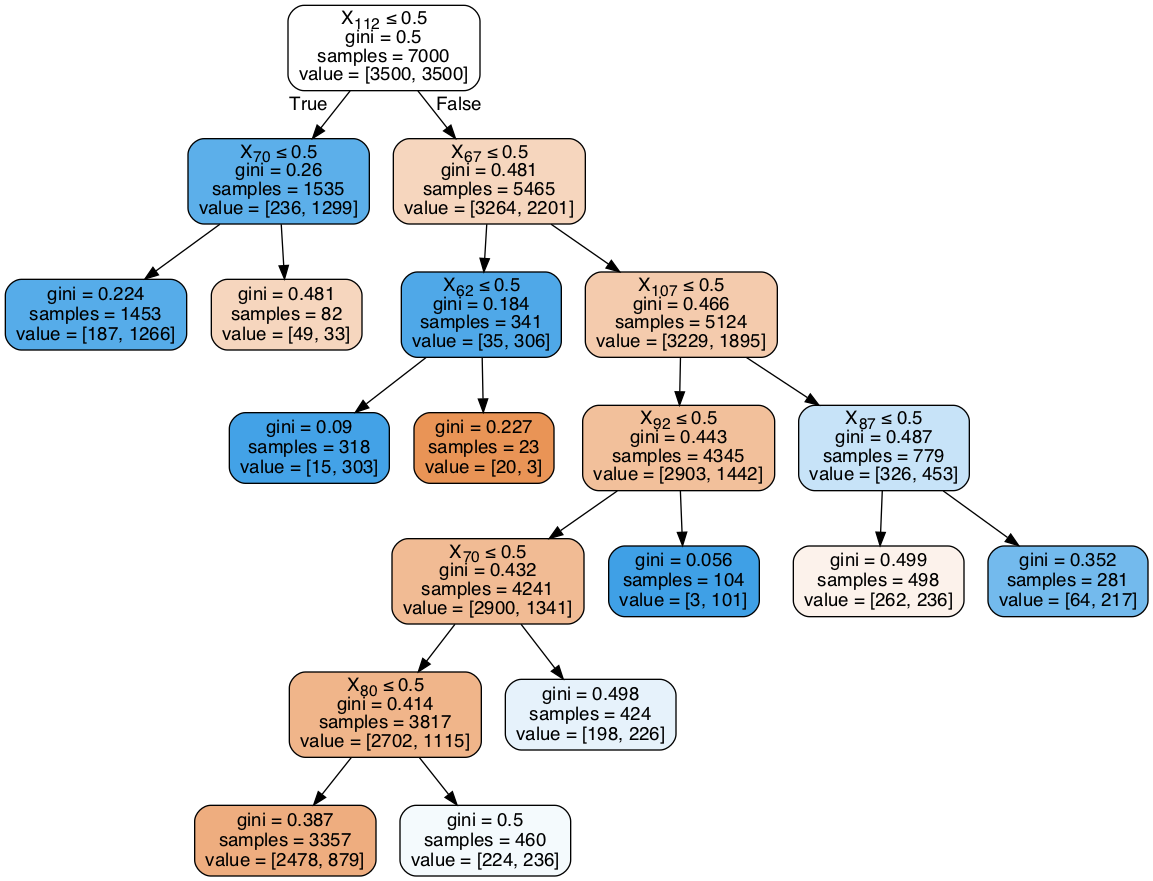

In [118]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())